In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TOKEN_SPAM_PROB_FILE="SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE="SpamData/03_Testing/prob-ham.txt"
TOKEN_ALL_PROB_FILE="SpamData/03_Testing/prob-all-tokens.txt"
TEST_FEATURE_MATRIX="SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE="SpamData/03_Testing/test-target.txt"
VOCAB_SIZE=2500

In [3]:
X_test=np.loadtxt(TEST_FEATURE_MATRIX,delimiter=' ')
y_test=np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_token=np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ') 

# Calculating Joint Probability

In [4]:
joint_log_spam=X_test.dot(np.log(prob_token_spam)-np.log(prob_all_token))+np.log(0.3110)

In [5]:
joint_log_spam[:5]

array([24.28168047,  2.16112748, 20.59151614, 17.75672733, 20.51528344])

In [6]:
joint_log_ham=X_test.dot(np.log(prob_token_ham)-np.log(prob_all_token))+np.log(1-0.3110)

In [7]:
joint_log_ham[:5]

array([-60.97237039, -11.01055656, -37.96868405, -59.13706871,
       -53.80631749])

In [8]:
joint_log_ham.size

1724

In [9]:
prediction=(joint_log_spam>joint_log_ham)

In [10]:
prediction[-5:]

array([ True, False, False, False, False])

In [11]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [12]:
joint_log_spam[-5:]

array([  27.46769036,  -76.05733139, -374.6504304 ,   -9.90308784,
       -112.01600128])

In [13]:
joint_log_ham[-5:]

array([-8.45113574e+01,  1.26580902e+01,  6.09667890e+01, -5.85895291e-02,
        2.44490019e+01])

In [14]:
joint_log_spam=X_test.dot(np.log(prob_token_spam))+np.log(0.3110)
joint_log_ham=X_test.dot(np.log(prob_token_ham))+np.log(1-0.3110)

In [15]:
correct_doc=(y_test==prediction).sum()
correct_doc

1685

In [16]:
X_test.shape[0]-correct_doc

39

In [17]:
accuracy=correct_doc/len(X_test)
accuracy

0.9773781902552204

# Visulization

In [18]:
yaxis_label='p(X | Spam)'
xaxis_label='p(X | Nonspam)'
linedata=np.linspace(start=-14000,stop=1,num=1000)

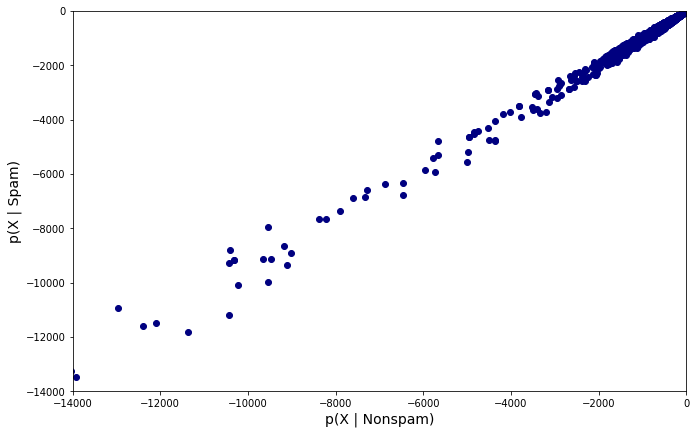

In [19]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy')
plt.show()

# Decision plot

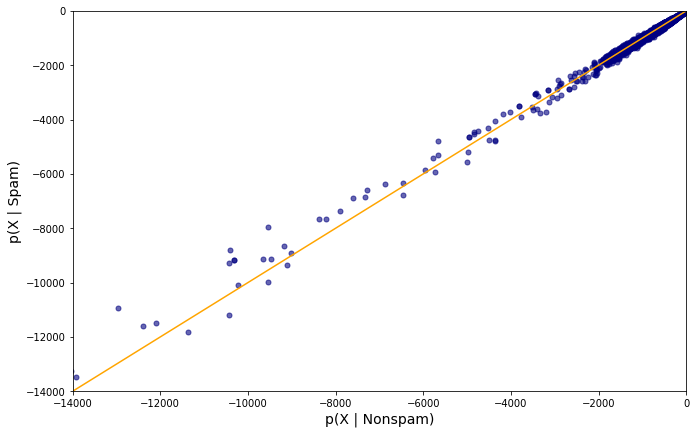

In [20]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.6,s=25)
plt.plot(linedata,linedata,color='orange')
plt.show()

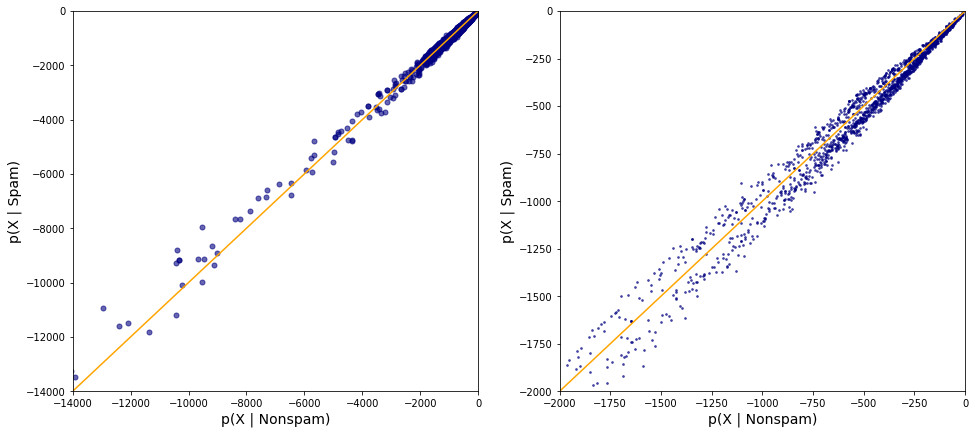

In [21]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.6,s=25)
plt.plot(linedata,linedata,color='orange')
plt.subplot(1,2,2)
plt.xlabel(xaxis_label,fontsize=14)
plt.ylabel(yaxis_label,fontsize=14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham,joint_log_spam,color='navy',alpha=0.6,s=3)
plt.plot(linedata,linedata,color='orange')
plt.show()

In [22]:
sns.set_style('whitegrid')
labels='Actual Category'
summary_df=pd.DataFrame({yaxis_label:joint_log_spam,xaxis_label:joint_log_ham,labels:y_test})

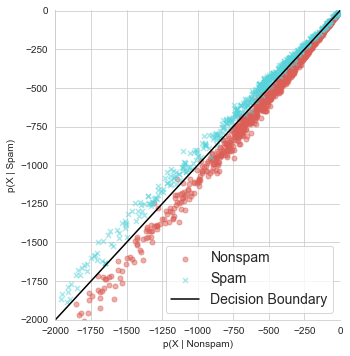

In [23]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,fit_reg=False,scatter_kws={'alpha':0.5,'s':25},hue=labels,markers=['o','x'],palette='hls',legend=False)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.plot(linedata,linedata,color='black')
plt.legend(('Nonspam','Spam','Decision Boundary'),loc="lower right",fontsize=14)
plt.show()

# False positive and False Negative

In [24]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [25]:
true_pos=(y_test==1) & (prediction==1)

In [26]:
true_pos.sum()

569

In [27]:
false_pos=(y_test==0)&(prediction==1)

In [28]:
false_pos.sum()

19

In [29]:
flase_neg=(y_test==1)&(prediction==0)

In [30]:
flase_neg.sum()

20

# Recall Score

In [32]:
recall_Score=true_pos.sum()/(true_pos.sum()+flase_neg.sum())

In [35]:
print("Recall Score: {:.2%}".format(recall_Score))

Recall Score: 96.60%


# Precision

In [36]:
precison=true_pos.sum()/(true_pos.sum()+false_pos.sum())

In [37]:
precison

0.967687074829932

# F score

In [38]:
f_score=2*(precison*recall_Score/(precison+recall_Score))
f_score

0.9668649107901445